<a href="https://colab.research.google.com/github/iSuthar/ML_practice_notebooks/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

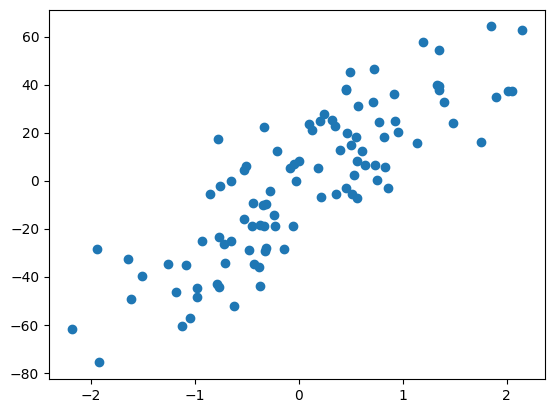

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

-2.29474455867698
[27.82809103]


In [5]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.intercept_)
print(rr.coef_)

-2.1269130035235735
[24.9546267]


In [6]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.intercept_)
print(rr1.coef_)

-1.4248441496033308
[12.93442104]


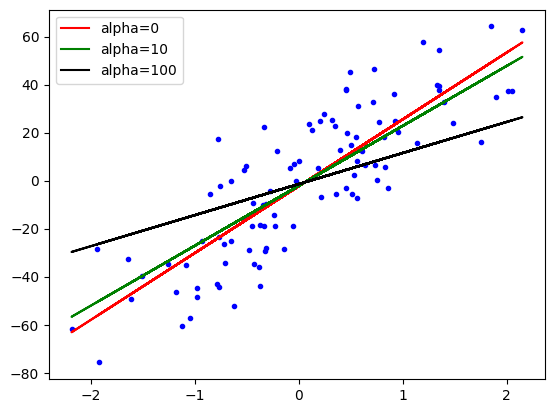

In [7]:
plt.plot(X, y, 'b.')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rr.predict(X), color='green', label='alpha=10')
plt.plot(X, rr1.predict(X), color='black', label='alpha=100')
plt.legend()
plt.show()

In [45]:
# LR class with Regularization
class RidgeRegression:
  def __init__(self,alpha=0.1,learning_rate=0.01,epochs=50,batch_size=None):
    self.alpha = alpha
    self.lr = learning_rate
    self.epochs = epochs
    self.batch_size = batch_size
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    # initialize
    self.coef_ = np.zeros(X_train.shape[1])
    self.intercept_ = 1
    m = X_train.shape[0]
    batch_size = X_train.shape[0] if self.batch_size is None else self.batch_size

    for i in range(self.epochs):
      batch_size = X_train.shape[0] if self.batch_size is None else self.batch_size
      for j in range(int(X_train.shape[0]/batch_size)):
        idx = random.sample(range(0, X_train.shape[0]), batch_size)
        y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
        error = y_hat - y_train[idx]

        dj_db = (2/m) * (np.mean(error))
        self.intercept_ -= self.lr * (dj_db)

        dj_dw = (2/m) * np.dot(error, X_train[idx])
        self.coef_ = self.coef_*(1 - (2/m)*self.alpha*self.lr) - self.lr * (dj_dw)

    return self

  def predict(self,X_test):
    return (X_test @ self.coef_) + self.intercept_

In [46]:
rreg1 = RidgeRegression(learning_rate=0.1 , epochs = 3500,  alpha=0)
rreg2 = RidgeRegression(learning_rate=0.1 , epochs = 3500,  alpha=10)
rreg3 = RidgeRegression(learning_rate=0.1 , epochs = 3500,  alpha=100)
rreg1.fit(X,y)
rreg2.fit(X,y)
rreg3.fit(X,y)

print(rreg1.intercept_)
print(rreg1.coef_)

print(rreg2.intercept_)
print(rreg2.coef_)

print(rreg3.intercept_)
print(rreg3.coef_)

-2.291659725731562
[27.82788199]
-2.1239962678828377
[24.95444959]
-1.4226163226093638
[12.93435115]


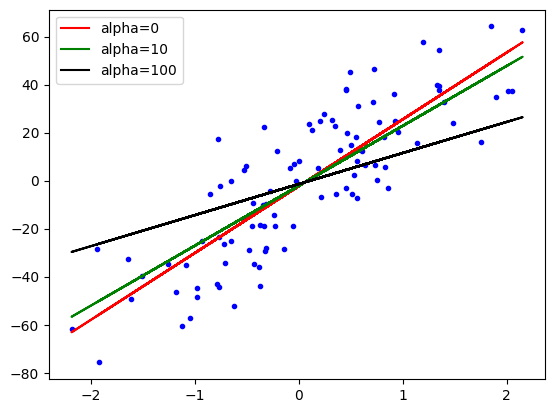

In [47]:
plt.plot(X, y, 'b.')
plt.plot(X, rreg1.predict(X), color='red', label='alpha=0')
plt.plot(X, rreg2.predict(X), color='green', label='alpha=10')
plt.plot(X, rreg3.predict(X), color='black', label='alpha=100')
plt.legend()
plt.show()
